# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()


,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> * Selection
* Do you need to encode the target variable (Yes/No)?
> * Yes
* If yes, briefly explain why you need to encode the target variable.
> * The target variable is in categorical form. It therefore, has to be encoded into a numerical value in order to train using it.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> * Label Encoding
* Explain why you have selected the above encoding method.
> * Label encoding is an encoding technique that assigns a unique numerical value to each category in a categorical variable.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [2]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn import preprocessing

# Select the appropriate encode
from sklearn.preprocessing import LabelBinarizer
#print(df['Selection'])

# Transform the target variable
labels=df['Selection']
enc=LabelBinarizer()
enc.fit(labels)
new_label=enc.transform(labels)

print(list(enc.classes_))
df['Selection']=new_label
#print(new_label)


display(df)


['No', 'Yes']


,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


<Axes: xlabel='Exam Mark', ylabel='test score'>

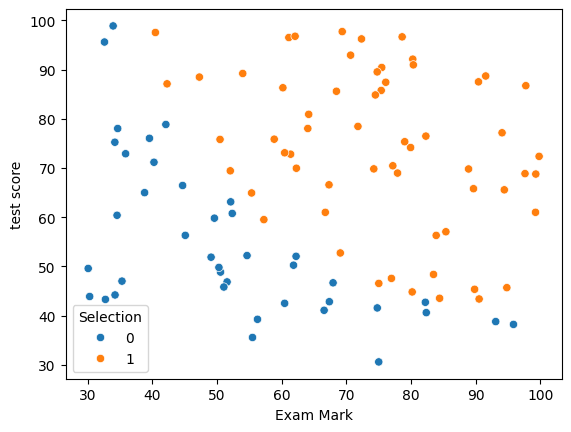

In [19]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

# sns.________(____,x = ____,y=___,hue =____)
sns.scatterplot(x='Exam Mark',y='test score',data=df,hue='Selection')


## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [3]:
# Write a function 'predict' to compute the logistic Regression model
x=df[['Exam Mark','test score']].values
y=df['Selection']
w=np.linspace(-10,10,1000)
b=0


def Sigmoid(z):
      # remove it after completing your code
  return 1/(1+np.exp(-z))

def predict(w,b,x):
  # Your code
  z=np.dot(x,w)+b
  y_hat=Sigmoid(z)
  return y_hat
  # remove it after completing your code

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * Using mean squared error (MSE) as the cost function for logistic regression is not appropriate. Logistic regression is a classification algorithm, and its output is probabilities that a given input belongs to a certain class. Therefore, it's more suitable to use a cost function that penalizes deviations from the true class labels rather than deviations from the actual values themselves.

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> * The loss function measures the error between the model's predictions and the actual target values for a single data point.
* What is a cost function?
> * The cost function aggregates the losses over the entire dataset.
* What is the distinction between them?
> * The loss function measures the error for a single data point, while cost function is the aggregate of loss function over multiple datapoints that constitute an entire dataset.

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [7]:
# write a function to estimate the derivatives of the cost function
def cost_fn(w,b,x,y):
    M,N=x.shape
    loss=np.zeros((M,))
    for i in range(M):
        loss[i]=-y[i]*np.log(predict(w,b,x[i]))-(1-y[i])*np.log(1-predict(w,b,x[i]))
    return np.mean(loss)

def compute_gradient_wb(w,b,x,y):
  J_train_values = []  # to store train loss values
  J_test_values = []   # to store test loss values
  M,N = x.shape
  dJ_dw = np.zeros((N,))
  dJ_db = 0
  for i in range(M):
    err = predict(w,b,x[i])-y[i]
    for j in range(N):
      dJ_dw[j] += err*x[i,j]
    dJ_db += err
  dJ_dw /= M
  dJ_db /= M
  J_train = cost_fn(w, b, X_train, y_train)
  J_test = cost_fn(w, b, X_test, y_test)
        
        # Append loss values to lists
  J_train_values.append(J_train)
  J_test_values.append(J_test)
  return dJ_dw,dJ_db,J_train_values,J_test_values


  

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [12]:
# Write a function to perform the gradient decent

def gradient_descent(w,b,X_train,X_test,y_train,y_test,alpha,num_iter):
  J_values = [1]
  for i in range(num_iter):
    dj_dw,dj_db,J_train_values, J_test_values = compute_gradient_wb(w,b,X_train,y_train)

    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    

    J_values.append(cost_fn(w,b,X_train,y_train))

    if i%10 == 0:
      print(f"{i:4d}th iteration----------------- cost:{J_values[-1]}")

  return w,b,J_train_values, J_test_values


## Model Training

In [13]:
# Write the code to train the model

# Split the data into train and test datasets using
# see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# get the data from dataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# split the dataset such that 20% test and 80% train data
X_train, X_test, y_train, y_test =train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=None) #your code


# initilize the weights
np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

# Fix the learning rate
alpha = 0.001

# fix the number of iteration
num_iter = 1000


w,b,J_train,J_test,J_train_values,J_test_values = gradient_descent(w_ini,b_ini,X_train, X_test, y_train, y_test,alpha,num_iter)
print(f"Final parameters: w:{w}, b:{b}")


C:\Users\green\AppData\Local\Temp\ipykernel_2956\1815668879.py:6: RuntimeWarning: divide by zero encountered in log
  loss[i]=-y[i]*np.log(predict(w,b,x[i]))-(1-y[i])*np.log(1-predict(w,b,x[i]))
C:\Users\green\AppData\Local\Temp\ipykernel_2956\1815668879.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  loss[i]=-y[i]*np.log(predict(w,b,x[i]))-(1-y[i])*np.log(1-predict(w,b,x[i]))


   0th iteration----------------- cost:nan
  10th iteration----------------- cost:nan
  20th iteration----------------- cost:2.382298930819034
  30th iteration----------------- cost:0.8404690267629957
  40th iteration----------------- cost:0.5478158260141084
  50th iteration----------------- cost:0.3794783358688103
  60th iteration----------------- cost:0.3133206613580691
  70th iteration----------------- cost:0.2936397505718646
  80th iteration----------------- cost:0.28838770606506003
  90th iteration----------------- cost:0.28701922640119826
 100th iteration----------------- cost:0.28666186466290444
 110th iteration----------------- cost:0.2865669768996133
 120th iteration----------------- cost:0.28654038913891544
 130th iteration----------------- cost:0.28653161469422406
 140th iteration----------------- cost:0.28652749288939744
 150th iteration----------------- cost:0.28652458735725184
 160th iteration----------------- cost:0.286521999987991
 170th iteration----------------- cost:

ValueError: not enough values to unpack (expected 6, got 4)

In [16]:
# Plot the train and test loss in one plot
# Plot train and test loss
plt.plot(J_train_values, label='Train Loss')
plt.plot(J_test_values, label='Test Loss')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train and Test Loss')

# Add legend
plt.legend()

# Show plot
plt.show()



NameError: name 'J_train_values' is not defined

<Axes: xlabel='Exam Mark', ylabel='test score'>

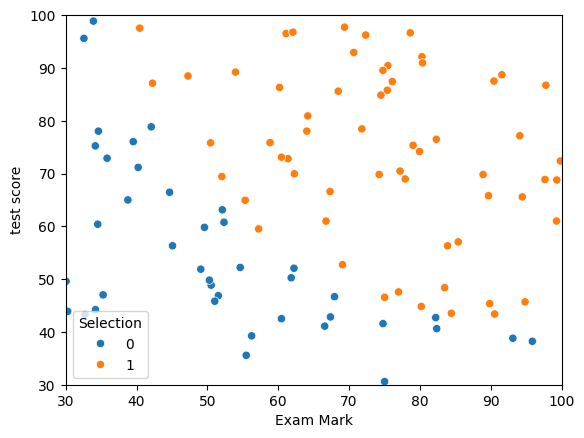

In [22]:
#  plot the Logistic Regression Model for the estimated w and b values

P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w[0]+Y[i,j]*w[1]+b
      logReg[i,j] = 1/(1+np.exp(-zz))



plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
#plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')



### Answer the following


* What does the P value signify in the provided code?
> * The P value represents the probability threshold used to classify a data point into one of the two classes. 
* How will altering the P value affect the outcome?
> * Altering the P value will change the threshold for classification. For example, setting P value as 0.6 restricts the number of positive datapoints, while P=0.4 classifies more points as positive.
* What range of values can P encompass?
> * The range of values of P can encompass from 0 to 1, inclusive.
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> * In a project aimed at classifying tumors as malignant or benign, the choice of value of the probability threshold (P) is crucial. A lower threshold would result in more false positives, that is, benign tumors may be classified as malignant, but fewer false negatives.On the other hand, a higher threshold would lead to fewer false positives but more false negatives. 

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [18]:
# Assuming the student's exam score is 65 and test score is 65
new_student_scores = np.array([[65, 65]])
w=np.random.rand(2)
b=-9

# Reshape to match the expected input shape (1 sample, 2 features)
new_student_scores = new_student_scores.reshape(1, -1)

# Predict whether the student will pass the interview
prediction = predict(w, b, new_student_scores)

# Convert probability to binary prediction
binary_prediction = 1 if prediction >= 0.5 else 0

if binary_prediction == 1:
    print("The student will pass the interview.")
else:
    print("The student will not pass the interview.")


The student will pass the interview.
